In [1]:
%matplotlib inline
import open_ply as op
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [13]:
# read .ply mesh
pathDesktop = 'C:/Users/cdelettre/Desktop/'

subj = 'P64_F01'
path = 'E:/Celine/Ferret_ExplDTI/'+subj+'/meshInAGrid/'
fmesh = path+subj+'_mesh.ply'
mesh = op.open_ply(fmesh)
npt=mesh["np"];
nt=mesh["nt"];
pt=mesh["p"];
t=mesh["t"];

In [14]:
# read the set of endpoints

fendpoints = path+subj+'_endpoints.txt'
endpoints = np.loadtxt(fendpoints)

In [23]:
divx = 4
divy = 4
divz = 4

In [24]:
xmax= max(pt[:,0])
xmin= min(pt[:,0])
ymax= max(pt[:,1])
ymin= min(pt[:,1])
zmax= max(pt[:,2])
zmin= min(pt[:,2])

dx = (xmax-xmin)/divx
dy = (ymax-ymin)/divy
dz = (zmax-zmin)/divz

In [25]:
cubenb = divx * divy * divz
grid = np.zeros((cubenb,6))

In [26]:
index = 0
for k in range(divz):
    for j in range(divy):
        for i in range(divx):
            x = xmin+dx/2+i*dx
            y = ymin+dy/2+j*dy
            z = zmin+dz/2+k*dz
            grid[index] = [x,y,z,dx,dy,dz]
            index += 1

In [27]:
order = 1 # 0: order x ie front/back // 1: order y ie right/left // 2: order z ie top/down
ind = np.zeros(cubenb)
if order == 0:
    ind = np.lexsort((grid[:,2],grid[:,1],grid[:,0]))
elif order == 1:
    ind = np.lexsort((grid[:,2],grid[:,0],grid[:,1]))
elif order == 2:
    ind = np.lexsort((grid[:,0],grid[:,1],grid[:,2]))
    
gridreordered= grid[ind]
#print order
#print gridreordered[:,0]

In [28]:
def isPointinCube(p,cube):
    cx = cube[0]
    cy = cube[1]
    cz = cube[2]
    dx = cube[3]
    dy = cube[4]
    dz = cube[5]
    
    if cx-dx/2<=p[0] and p[0]<cx+dx/2 and cy-dy/2<=p[1] and p[1]<cy+dy/2 and cz-dz/2<=p[2] and p[2]<cz+dz/2 :
        return True
    else: 
        return False

In [29]:
tab = np.zeros((len(endpoints),2)) #cube id, endpoint id
conMat = np.zeros((cubenb,cubenb))

for i in range(len(endpoints)):
    ep = endpoints[i]
    for j in range(cubenb):
        c = gridreordered[j]
        if isPointinCube(ep,c):
            #print 'ep',i,'is in cube',c[0]
            tab[i] = [j,i]
            if i%2 == 1:
                conMat[tab[i-1,0],j]+=1
                conMat[j,tab[i-1,0]]+=1
            break
        tab[i] = [-1,i] #out of cubes
            

C:\Users\cdelettre\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


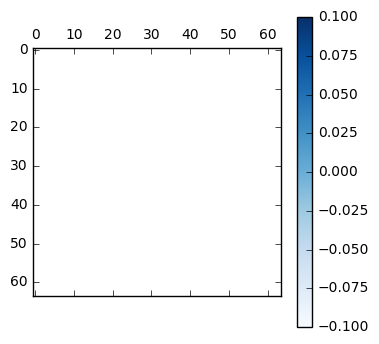

In [30]:

plt.matshow(np.log10(conMat),interpolation='nearest',cmap=plt.cm.Blues)
#plt.xticks(range(8),xorder)
#plt.yticks(range(8),xorder)
plt.colorbar()
#plt.savefig(path+subj+'_grid'+str(order)+'_'+str(divx)+str(divy)+str(divz)+'_log10.png')
plt.show()

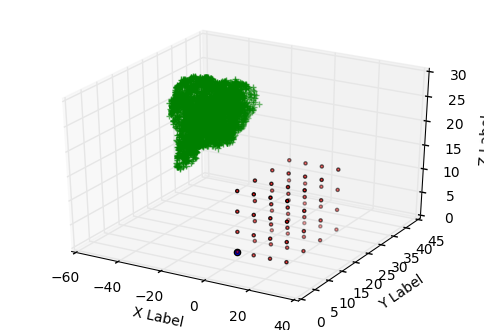

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(grid[:,0], grid[:,1], grid[:,2],c='r',marker='.')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(grid[0,0],grid[0,1],grid[0,2],c='b',marker='o')
ax.scatter(endpoints[:,0],endpoints[:,1],endpoints[:,2],c='g',marker='+')